In [115]:
#Social_Network_Ads.csv

**Importing the libraries**

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [117]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [118]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [119]:
df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [120]:
x = df.drop(columns= "Purchased", axis= 1).values
y = df['Purchased'].values

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=4)

In [122]:
print("x_train-shape : ", x_train.shape)
print("y_train-shape : ", y_train.shape)
print("x_test-shape : ", x_test.shape)
print("y_test-shape : ", y_test.shape)

x_train-shape :  (280, 4)
y_train-shape :  (280,)
x_test-shape :  (120, 4)
y_test-shape :  (120,)


**Feature Scaling**

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

**Predicting the Test set results**

In [134]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

**Making the Confusion Matrix**

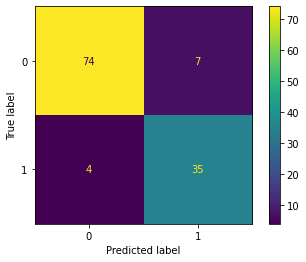

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=rf.classes_).plot()

**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


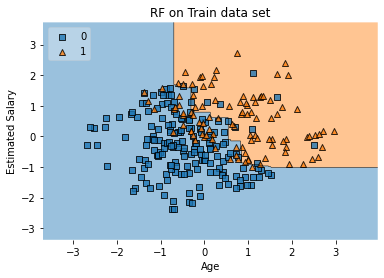

In [145]:
#Since we have more than 2 features, we are reducing the features 
#Using Dimension Reduction to consolidate all the features into 2 dimensions.

from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
rf.fit(X_train2, y_train)



plot_decision_regions(X_train2, y_train, clf=rf, legend=2, )
# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('RF on Train data set')
plt.show()


**Visualising the Test set results**

In [146]:
X_test2 = pca.fit_transform(x_test)
rf.fit(X_test2, y_test)

RandomForestClassifier(max_depth=2, max_features='sqrt')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


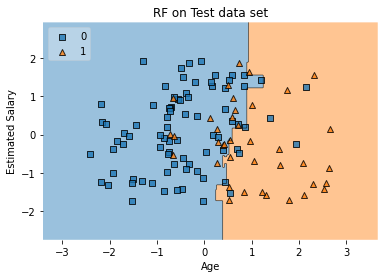

In [147]:
plot_decision_regions(X_test2, y_test, clf=rf, legend=2, )
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('RF on Test data set')
plt.show()


In [148]:
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None) 
print(F1_score)

[0.93081761 0.86419753]


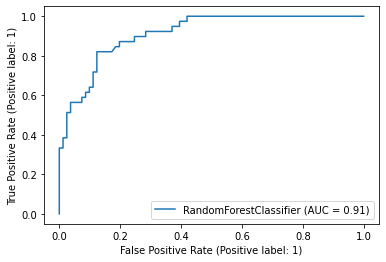

In [150]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test2, y_test)

plt.show()